In [1]:
import matplotlib.pyplot as plt
import numpy as np
import sys
import healpy as hp
from tqdm import tqdm
import pickle as pl
sys.path.append('../')
import os
%matplotlib inline

In [2]:
%load_ext autoreload
%autoreload 2
from dance.simulations import Sky
from dance.qe import Reconstruct
from dance.delens import Delens

MPI startup(): FI_PSM3_UUID was not generated, please set it to avoid possible resources ownership conflicts between MPI processes


In [3]:
basedir = '/mnt/sdceph/users/alonappan/DANCE_debug'

In [ ]:
recon_lens_bias = Reconstruct(basedir,2048,1,model='aniso',Acb=0,lmin_ivf=2,lmax_ivf=1024,lmax_qlm=1024,qe_key='a_p',verbose=1)

In [4]:
recon_aa = Reconstruct(basedir,2048,1,model='aniso',Acb=1e-6,lmin_ivf=2,lmax_ivf=1024,lmax_qlm=1024,qe_key='a_p',verbose=1)

CMB : INFO - Anisotropic cosmic birefringence model selected
CMB : INFO - Loading CMB power spectra from file
CMB : INFO - Anisotropic cosmic birefringence model selected
CMB : INFO - Using the set b for the simulation


CMB : INFO - Loading CMB power spectra from file
CMB : INFO - Anisotropic cosmic birefringence model selected
CMB : INFO - Loading CMB power spectra from file
/mnt/home/alonappan/anaconda3/cstm_pkgs/plancklens/plancklens/utils.py:124: RuntimeWarning: overflow encountered in cast
  return hashlib.sha1(np.copy(cl.astype(dtype), order='C')).hexdigest()


In [ ]:
mcn0 = []
for i in tqdm(range(50)):
    qlm = recon_aa.get_qlm_recon(i,norm=False,which='cyclic')
    mcn0.append(hp.alm2cl(qlm))
mcn0 = np.array(mcn0*recon_aa.norm**2)

100%|██████████| 50/50 [00:03<00:00, 16.03it/s]


In [25]:
mcn1 = []
for i in tqdm(range(50)):
    qlm_c = recon_aa.get_qlm_recon(i,norm=False,which='cyclic')
    qlm_p = recon_aa.get_qlm_recon(i,norm=False,which='pair')
    cl = 2*hp.alm2cl(qlm_p)  - 2*hp.alm2cl(qlm_c)
    mcn1.append(cl*recon_aa.norm**2)
mcn1 = np.array(mcn1)

100%|██████████| 50/50 [00:05<00:00,  9.76it/s]


In [26]:
qlm = recon_aa.get_qlm_recon(0,which='self')

(1e-12, 0.0001)

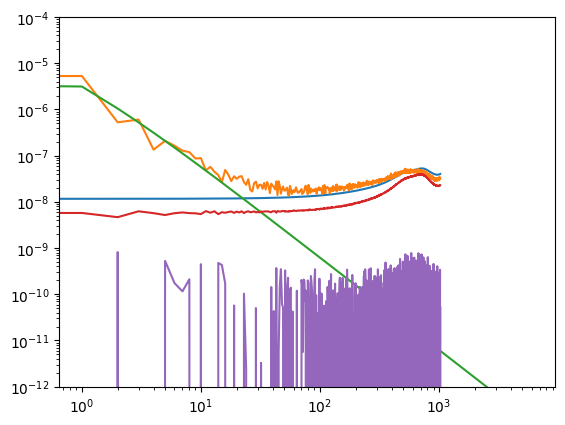

In [27]:
t = recon_aa.wf.mysims.sky.cmb.cl_aa()
plt.loglog(recon_aa.get_n0(0))
plt.loglog(hp.alm2cl(qlm))
plt.loglog(t)
plt.loglog(mcn0.mean(axis=0))
plt.loglog(mcn1.mean(axis=0))
plt.ylim(1e-12,1e-4)

In [38]:
delens_aa = Delens(basedir,2048,1,model='aniso',Acb=1e-6,lmin_ivf=2,lmax_ivf=4096,lmax_qlm=4096,qe_key='p_p',verbose=1,special_case=True)

CMB : INFO - Anisotropic cosmic birefringence model selected
CMB : INFO - Loading CMB power spectra from file
CMB : INFO - Anisotropic cosmic birefringence model selected
CMB : INFO - Loading CMB power spectra from file


/mnt/home/alonappan/anaconda3/cstm_pkgs/plancklens/plancklens/utils.py:124: RuntimeWarning: overflow encountered in cast
  return hashlib.sha1(np.copy(cl.astype(dtype), order='C')).hexdigest()


Caching sky fractions...


CMB : INFO - Anisotropic cosmic birefringence model selected
CMB : INFO - Loading CMB power spectra from file
CMB : INFO - Anisotropic cosmic birefringence model selected
CMB : INFO - Loading CMB power spectra from file


In [39]:
recon_aa_d = Reconstruct(basedir,2048,1,model='aniso',Acb=1e-6,lmin_ivf=2,lmax_ivf=1024,lmax_qlm=1024,qe_key='a_p',verbose=1,delens=delens_aa)

CMB : INFO - Anisotropic cosmic birefringence model selected
CMB : INFO - Loading CMB power spectra from file
CMB : INFO - Anisotropic cosmic birefringence model selected
CMB : INFO - Loading CMB power spectra from file


Delens Filtering
Caching sky fractions...


In [40]:
qcl_d = recon_aa_d.get_qcl(0,)

In [41]:
qcl = recon_aa.get_qcl(0)

In [42]:
t = recon_aa.wf.mysims.sky.cmb.cl_aa()

In [45]:
bias = recon_lens_bias.get_qlm_recon(0)

(1e-12, 0.0001)

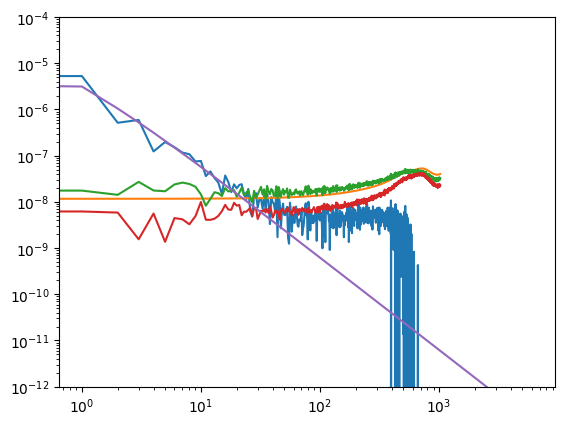

In [52]:
plt.loglog(qcl,label='lensed')
plt.loglog(recon_aa.get_n0(0))
plt.loglog(hp.alm2cl(bias))
plt.loglog(hp.alm2cl(qlm)*recon_aa.norm**2 *2 )
plt.loglog(t)
plt.ylim(1e-12,1e-4)

(2, 1024)

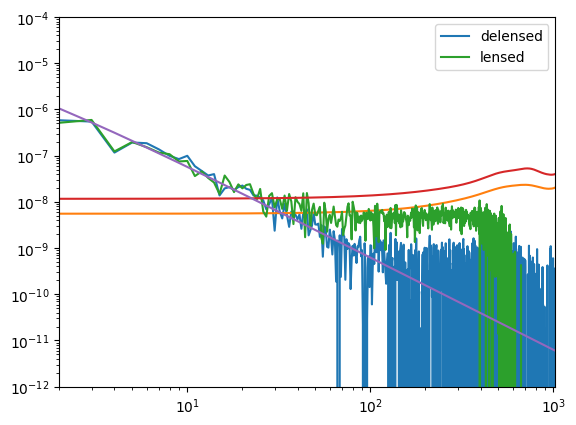

In [20]:
plt.loglog(qcl_d,label='delensed')
plt.loglog(recon_aa_d.get_n0(0))
plt.loglog(qcl,label='lensed')
plt.loglog(recon_aa.get_n0(0))
plt.loglog(t)
plt.legend()
plt.ylim(1e-12,1e-4)
plt.xlim(2,1024)

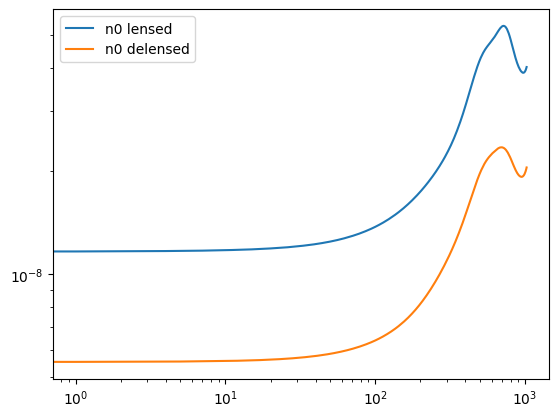

In [11]:
plt.loglog(recon_aa.get_n0(0),label='n0 lensed')
plt.loglog(recon_aa_d.get_n0(0),label='n0 delensed')
plt.legend()

/tmp/ipykernel_813883/1086071260.py:3: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  plt.xlim(0,1024)


(0.6465185261832656, 1024)

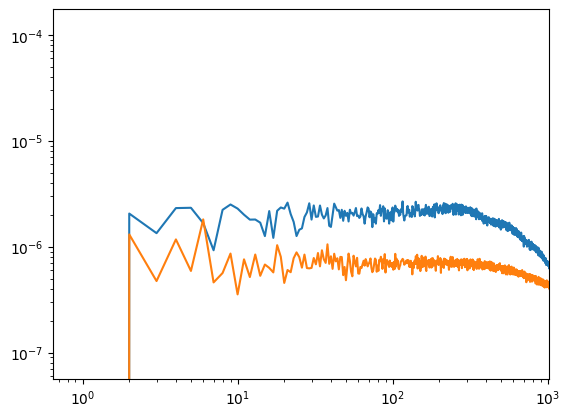

In [12]:
plt.loglog(hp.alm2cl(recon_aa.wf.mysims.get_sim_blm(0)),label='E lensed')
plt.loglog(hp.alm2cl(recon_aa_d.wf.mysims.get_sim_blm(0)),label='E delensed')
plt.xlim(0,1024)
